In [1]:
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

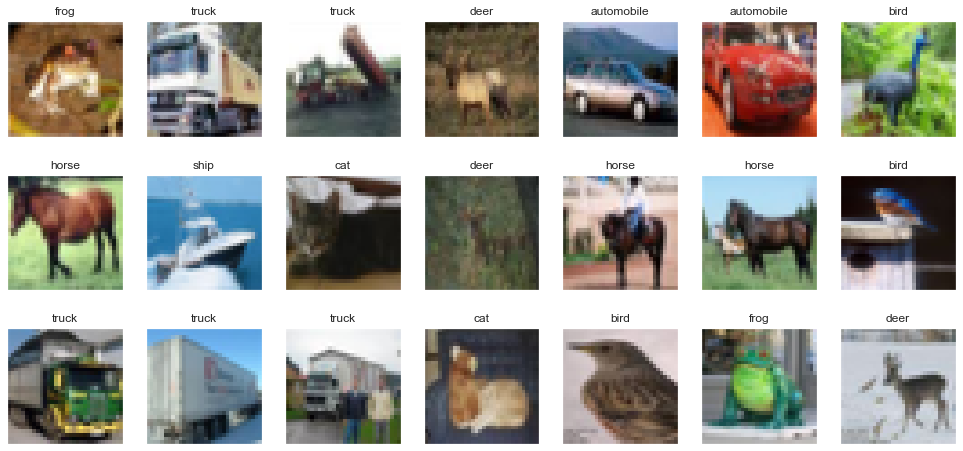

In [4]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [5]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test  = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

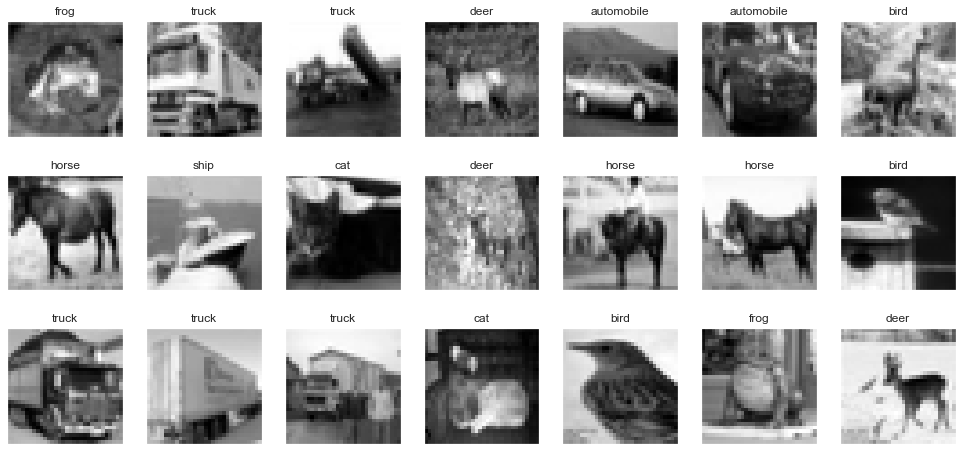

In [6]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [7]:
X_train  = X_train/255
X_test  = X_test/255

In [8]:
one_hot_encoder = OneHotEncoder(sparse=False)


OneHotEncoder(sparse=False)

In [9]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [13]:

y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [19]:
X_train.shape

(50000, 32, 32, 1)

In [22]:
# input shape 
input_shape = (X_train.shape[1], X_train.shape[2], 1)

(32, 32, 1)

In [23]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [27]:
history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 527s 11ms/sample - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/2
50000/50000 [==============================] - 545s 11ms/sample - loss: 2.3028 - acc: 0.1004 - val_loss: 2.3027 - val_acc: 0.1000


In [34]:
model.save('CNN_CIFAR.h5')

In [36]:
model = load_model('CNN_CIFAR')

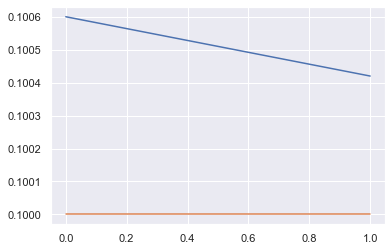

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

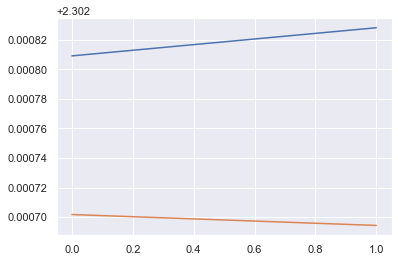

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [39]:
predictions = model.predict(X_test)

In [40]:
predictions = one_hot_encoder.inverse_transform(predictions)

In [41]:
y_test = one_hot_encoder.inverse_transform(y_test)

In [42]:
cm = confusion_matrix(y_test, predictions)

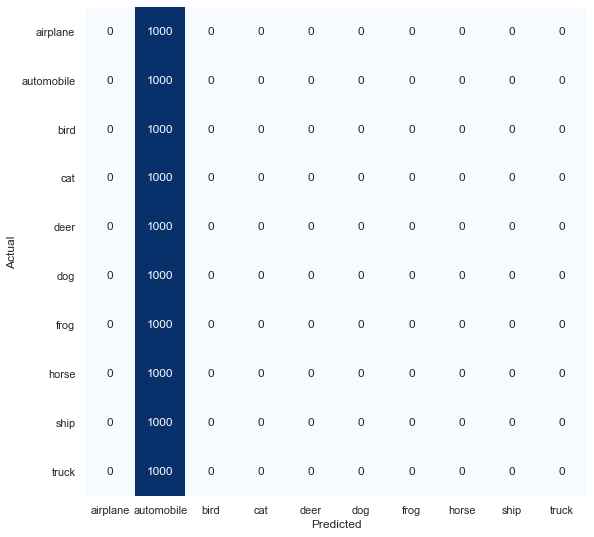

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [45]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

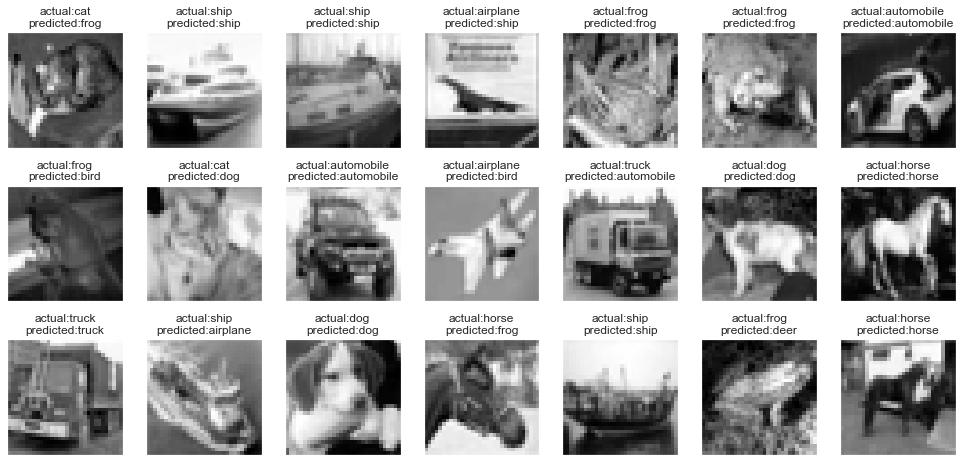

In [33]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()